In [1]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from funcs import *
from datas import *
from models import *
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import Vocab
from collections import Counter

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# Fix random seed for reproducibility
same_seeds(1689)

cuda


In [5]:
train_texts, train_labels = read_data("aclImdb/train")
test_texts, test_labels = read_data("aclImdb/test")

In [6]:
tokenizer = get_tokenizer('basic_english')
tokenized_texts = [tokenizer(text) for text in train_texts]

# Count the frequency of each token in the text data
counter = Counter(token for text in tokenized_texts for token in text)
specials = ['<unk>', '<pad>', '<bos>', '<eos>']
vocab = Vocab(counter, specials=specials)

In [7]:
dataset = CustomTextDataset1(train_texts, train_labels, vocab, tokenizer)
train_size = int(len(dataset) * 0.8)
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [12]:
train_losses, train_accs, valid_losses, valid_accs = train_valid1(
    LSTMClassifier(vocab_size=len(vocab), embedding_dim=100, hidden_dim=64, num_classes=2, 
                   num_layers=2, bidirectional=True, dropout=0.5), 
    train_dataset, val_dataset)

  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [1], train loss: [0.0106], train accuracy: [0.5576]
epoch [1], valid loss: [0.0110], valid accuracy: [0.5618]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [2], train loss: [0.0093], train accuracy: [0.6592]
epoch [2], valid loss: [0.0060], valid accuracy: [0.8382]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [3], train loss: [0.0051], train accuracy: [0.8712]
epoch [3], valid loss: [0.0049], valid accuracy: [0.8778]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [4], train loss: [0.0035], train accuracy: [0.9197]
epoch [4], valid loss: [0.0048], valid accuracy: [0.8872]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [5], train loss: [0.0024], train accuracy: [0.9479]
epoch [5], valid loss: [0.0048], valid accuracy: [0.8872]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [6], train loss: [0.0017], train accuracy: [0.9648]
epoch [6], valid loss: [0.0056], valid accuracy: [0.8866]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [7], train loss: [0.0014], train accuracy: [0.9725]
epoch [7], valid loss: [0.0059], valid accuracy: [0.8866]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [8], train loss: [0.0012], train accuracy: [0.9745]
epoch [8], valid loss: [0.0078], valid accuracy: [0.8802]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [9], train loss: [0.0010], train accuracy: [0.9825]
epoch [9], valid loss: [0.0063], valid accuracy: [0.8792]


  0%|          | 0/313 [00:00<?, ?it/s]

epcoh [10], train loss: [0.0007], train accuracy: [0.9877]
epoch [10], valid loss: [0.0062], valid accuracy: [0.8794]


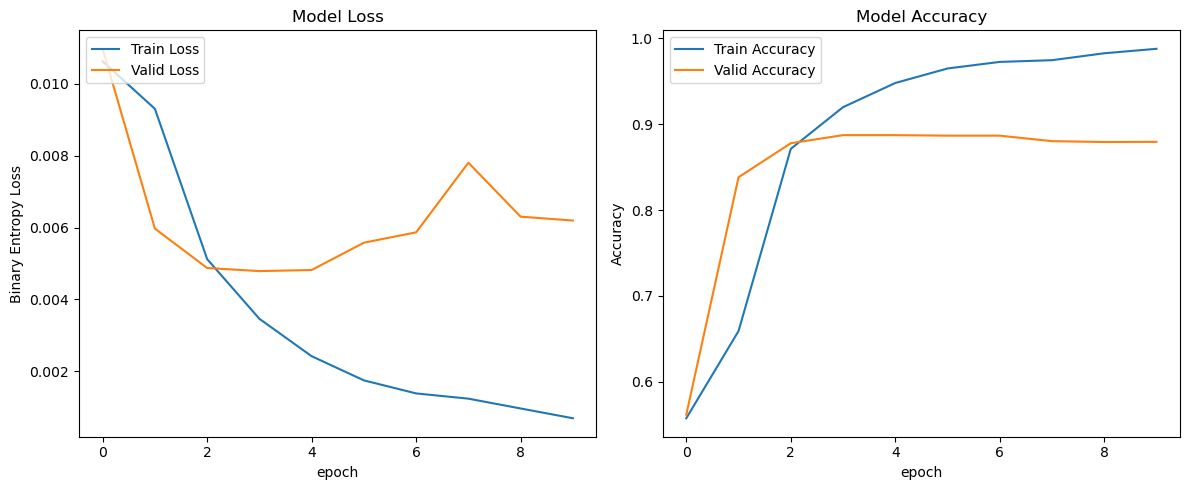

In [13]:
show_process(train_losses, train_accs, valid_losses, valid_accs)

# Train and Test

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMClassifier(vocab_size=len(vocab), embedding_dim=100, hidden_dim=64, num_classes=2, num_layers=2, bidirectional=True, dropout=0.5)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5, lr=5e-3)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.98, last_epoch=-1)

batch_size = 64
n_epochs = 10
# using training set and validation set to train the model
train_loader = DataLoader(dataset, collate_fn=collate_batch, batch_size=batch_size, shuffle=True)

train_losses = []
train_accs = []

for epoch in range(1, n_epochs + 1):
    train_loss = 0
    train_acc = 0

    model.train()
    for label, text in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(text).squeeze(1).float()
        loss = criterion(outputs, label.long())
        
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.round(torch.sigmoid(outputs))
        _, predicted = torch.max(preds, dim=1)
        train_acc += torch.sum(predicted == label).item()
    scheduler.step()

    epoch_train_loss = train_loss / len(train_loader.dataset)
    epoch_train_acc = train_acc / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)
    train_accs.append(epoch_train_acc)
    print("epcoh [%d], train loss: [%.4f], train accuracy: [%.4f]" % (epoch, epoch_train_loss, epoch_train_acc))

  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [1], train loss: [0.0099], train accuracy: [0.6289]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [2], train loss: [0.0066], train accuracy: [0.8120]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [3], train loss: [0.0047], train accuracy: [0.8792]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [4], train loss: [0.0033], train accuracy: [0.9212]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [5], train loss: [0.0023], train accuracy: [0.9485]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [6], train loss: [0.0016], train accuracy: [0.9673]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [7], train loss: [0.0013], train accuracy: [0.9738]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [8], train loss: [0.0012], train accuracy: [0.9734]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [9], train loss: [0.0012], train accuracy: [0.9756]


  0%|          | 0/391 [00:00<?, ?it/s]

epcoh [10], train loss: [0.0008], train accuracy: [0.9838]


In [16]:
test_dataset = CustomTextDataset1(test_texts, test_labels, vocab, tokenizer)

# Create a data loader for the test dataset
test_loader = DataLoader(test_dataset, collate_fn=collate_batch, batch_size=batch_size, shuffle=False)

test_loss = 0
test_acc = 0
model.eval()
for label, text in tqdm(test_loader):
    with torch.no_grad():
        outputs = model(text)
        loss = criterion(outputs, label.long())
        
        test_loss += loss.item()
        preds = torch.round(torch.sigmoid(outputs))
        _, predicted = torch.max(preds, dim=1)
        test_acc += torch.sum(predicted == label).item()
test_loss = test_loss / len(test_loader.dataset)
test_acc = test_acc / len(test_loader.dataset)
print("test loss: [%.4f], test accuracy: [%.4f]" % (test_loss, test_acc))


  0%|          | 0/391 [00:00<?, ?it/s]

test loss: [0.0072], test accuracy: [0.8774]


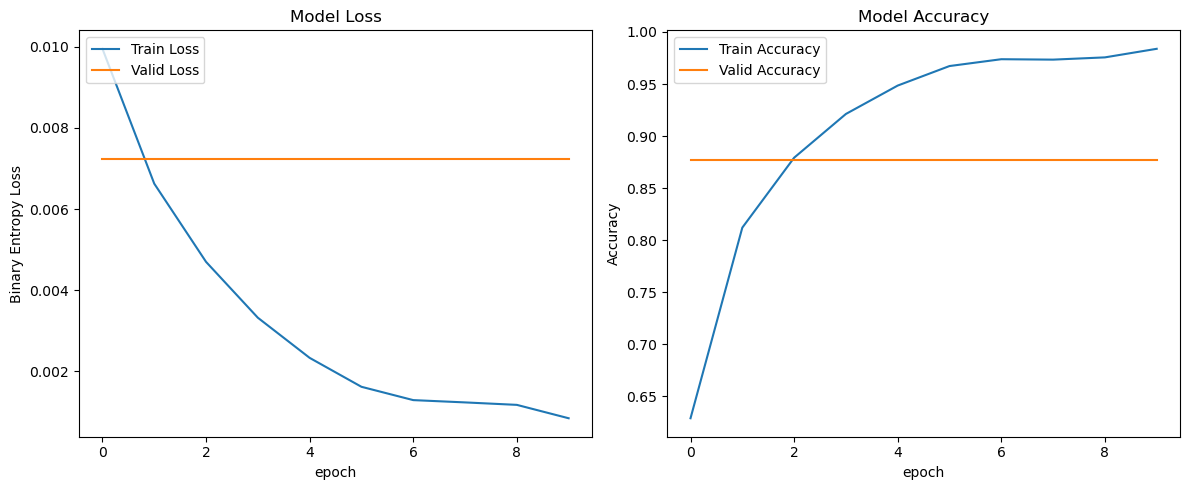

In [18]:
test_losses = [test_loss for _ in range(n_epochs)]
test_accs = [test_acc for _ in range(n_epochs)]
show_process(train_losses, train_accs, test_losses, test_accs) 